In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [205]:
#Carga de archivo 
df = pd.read_csv('BergamoItalia.csv')

#Verificamos el tipo de datos 
df.dtypes

source                             object
name                               object
neighborhood_overview              object
host_id                             int64
host_since                         object
host_response_time                 object
host_response_rate                  int64
host_is_superhost                  object
host_verifications                 object
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
neighbourhood_group_cleansed       object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                            int64
beds                                int64
amenities                          object
price                             float64
minimum_nights                    

In [206]:
#Imprimimos solo columnas de valores float
df.select_dtypes(include=['float64']).columns.tolist()

['latitude',
 'longitude',
 'bathrooms',
 'price',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [207]:
#Imprimimos solo columnas de valores object
df.select_dtypes(include=['object']).columns.tolist()

['source',
 'name',
 'neighborhood_overview',
 'host_since',
 'host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'amenities',
 'has_availability',
 'calendar_last_scraped',
 'first_review',
 'last_review',
 'license',
 'instant_bookable']

In [208]:
#Imprimimos solo columnas de valores int
df.select_dtypes(include=['int64']).columns.tolist()

['host_id',
 'host_response_rate',
 'accommodates',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'availability_eoy',
 'number_of_reviews_ly',
 'estimated_occupancy_l365d',
 'estimated_revenue_l365d',
 'calculated_host_listings_count']

In [209]:
#Corrobamos valores nulos
df.isnull().sum().sum()

np.int64(0)

RESUMEN DE APLICACIÓN DE MÉTODOS DE SUSTITUCIÓN PARA VALORES NULOS 

------sustitución por un valor en concreto: (object)
'neighborhood_overview', 'host_response_time', 'host_is_superhost', 'has_availability', 'first_review', 'last_review', 'license'


------sustitución por mediana: (int)
'host_response_rate', 'bedrooms', 'beds', 'estimated_revenue_l365d'
------sustitución por mediana: (float)
'bathrooms','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'


------sustitución por media: (float)
'price'

CREACIÓN DE DATAFRAME PARA PODER PROCESAR LOS OUTLIERS

In [210]:
#Object se queda como cualitativas
df_object = df.select_dtypes(include=['object'])
df_object.head(3)

,source,name,neighborhood_overview,host_since,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,city scrape,Mo's Cozy Cabana,The cabana is just a moments walk to 'The Spli...,03/07/2010,within an hour,t,"['email', 'phone']",t,t,Belize Islands,Belize,Tiny home,Entire home/apt,"[""Backyard"", ""Extra pillows and blankets"", ""Ai...",t,23/03/2025,13/08/2010 00:00,13/03/2025 00:00,NO INFORMATION PROVIDED,f
1,city scrape,"Seaside Villas 4 2nd Flr - Pool, Beach, Jacuzzi","Right on the beach, this building is in a prim...",19/05/2011,within an hour,Without consideration,"['email', 'phone']",t,t,Belize Islands,Belize,Entire condo,Entire home/apt,"[""BBQ grill"", ""Dedicated workspace"", ""Kitchen""...",t,23/03/2025,18/04/2017 00:00,06/02/2025 00:00,NO INFORMATION PROVIDED,t
2,city scrape,Valarosa - Sweet cottage,Valarosa is on Avenida Chechem in a popular re...,19/05/2011,within an hour,Without consideration,"['email', 'phone']",t,t,Belize Islands,Belize,Entire home,Entire home/apt,"[""Fire extinguisher"", ""Dedicated workspace"", ""...",t,23/03/2025,24/02/2016 00:00,25/01/2025 00:00,NO INFORMATION PROVIDED,t


EVALUACIÓN DE COLUMNAS POR DIAGRAMAS DE CAJA

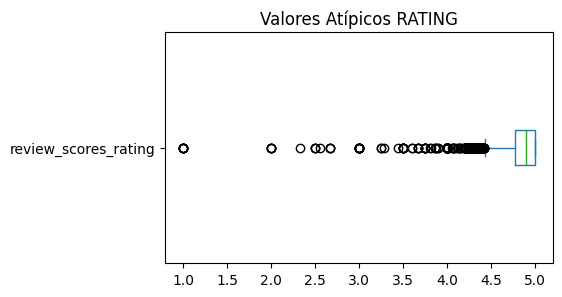

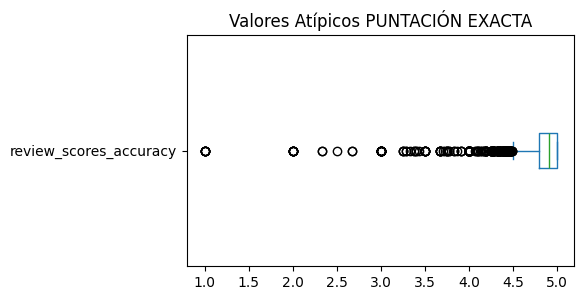

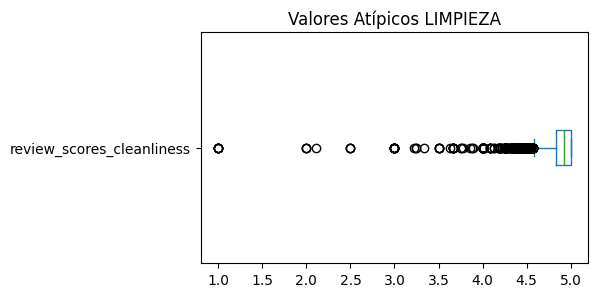

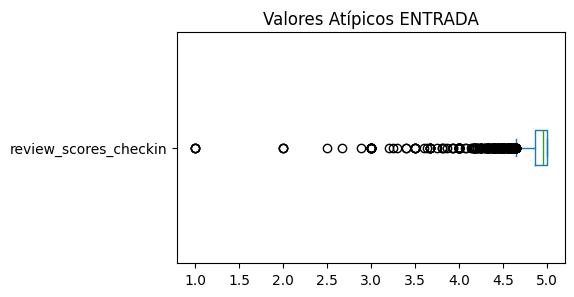

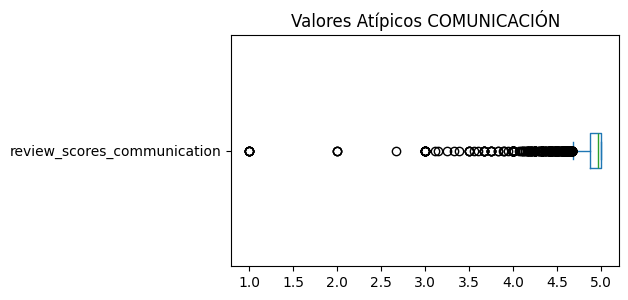

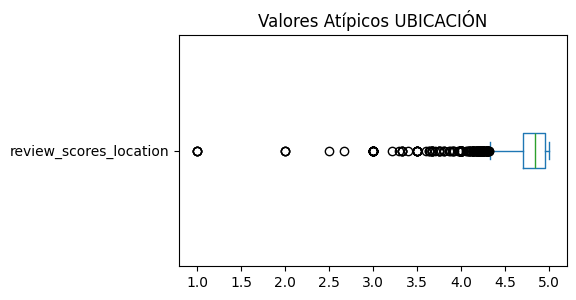

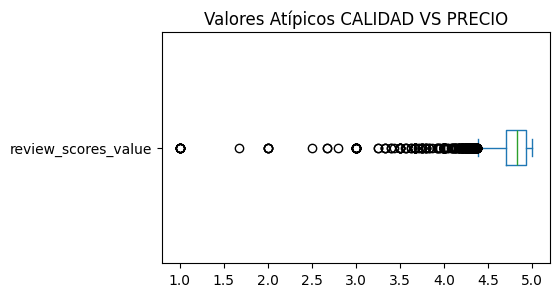

In [211]:
#Realizamos diagramas a columnas que sean evaluativas dataframe (float) para verificar que no salgan de rango
fig = plt.figure(figsize =(5, 3))
df['review_scores_rating'].plot(kind='box', vert=False)
plt.title("Valores Atípicos RATING")
plt.show()

fig = plt.figure(figsize =(5, 3))
df['review_scores_accuracy'].plot(kind='box', vert=False)
plt.title("Valores Atípicos PUNTACIÓN EXACTA")
plt.show()

fig = plt.figure(figsize =(5, 3))
df['review_scores_cleanliness'].plot(kind='box', vert=False)
plt.title("Valores Atípicos LIMPIEZA")
plt.show()

fig = plt.figure(figsize =(5, 3))
df['review_scores_checkin'].plot(kind='box', vert=False)
plt.title("Valores Atípicos ENTRADA")
plt.show()

fig = plt.figure(figsize =(5, 3))
df['review_scores_communication'].plot(kind='box', vert=False)
plt.title("Valores Atípicos COMUNICACIÓN")
plt.show()

fig = plt.figure(figsize =(5, 3))
df['review_scores_location'].plot(kind='box', vert=False)
plt.title("Valores Atípicos UBICACIÓN")
plt.show()

fig = plt.figure(figsize =(5, 3))
df['review_scores_value'].plot(kind='box', vert=False)
plt.title("Valores Atípicos CALIDAD VS PRECIO")
plt.show()

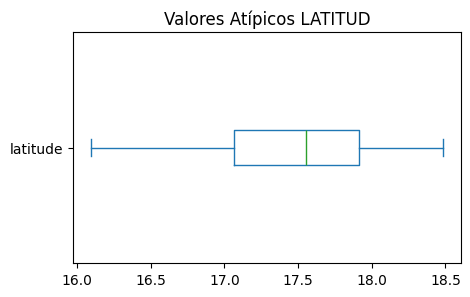

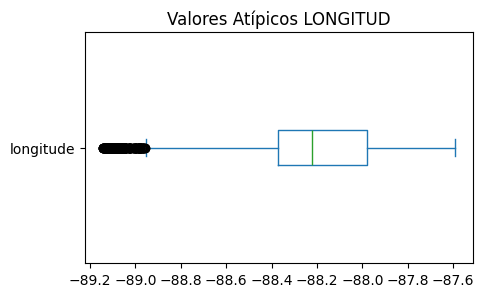

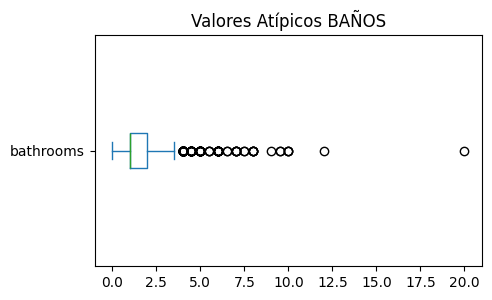

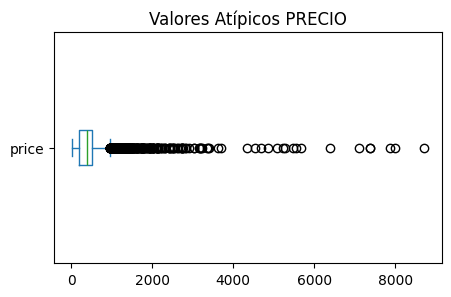

In [212]:
##Realizamos diagramas a columnas que sean no sean evaluativas del dataframe (float) para verificar que no salgan de rango
fig = plt.figure(figsize =(5, 3))
df['latitude'].plot(kind='box', vert=False)
plt.title("Valores Atípicos LATITUD")
plt.show()

fig = plt.figure(figsize =(5, 3))
df['longitude'].plot(kind='box', vert=False)
plt.title("Valores Atípicos LONGITUD")
plt.show()

fig = plt.figure(figsize =(5, 3))
df['bathrooms'].plot(kind='box', vert=False)
plt.title("Valores Atípicos BAÑOS")
plt.show()

fig = plt.figure(figsize =(5, 3))
df['price'].plot(kind='box', vert=False)
plt.title("Valores Atípicos PRECIO")
plt.show()

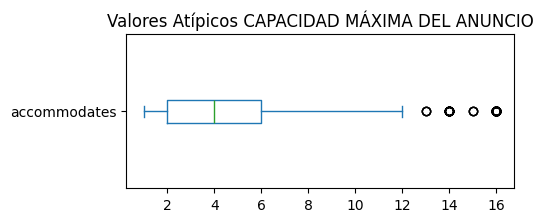

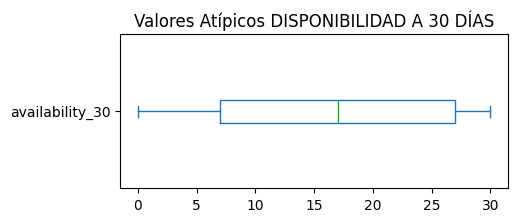

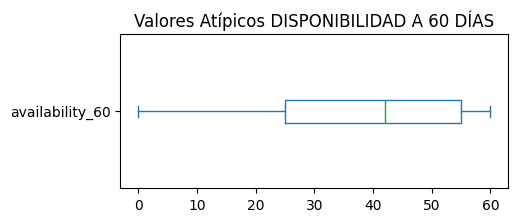

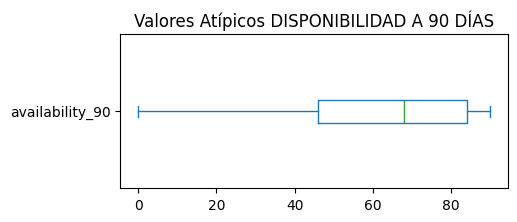

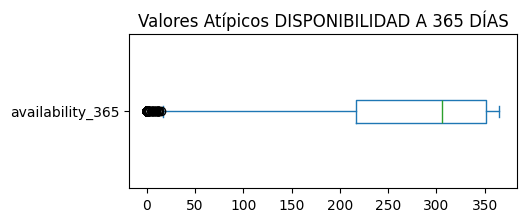

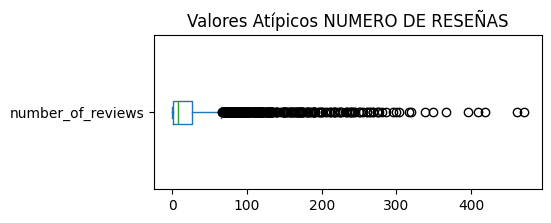

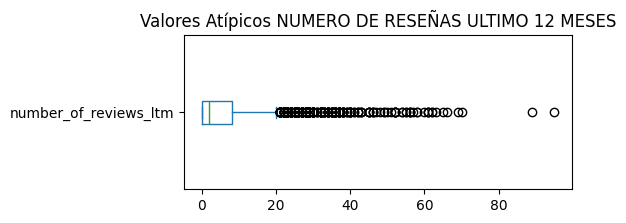

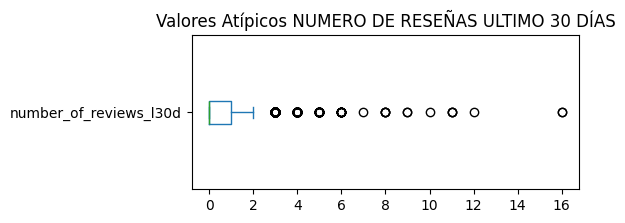

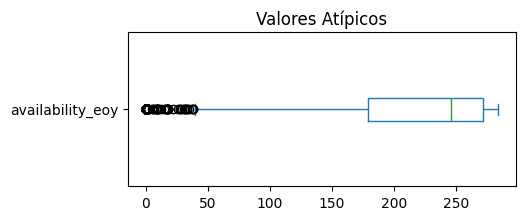

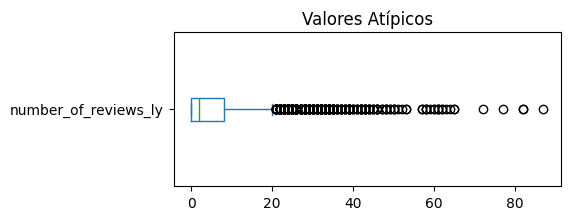

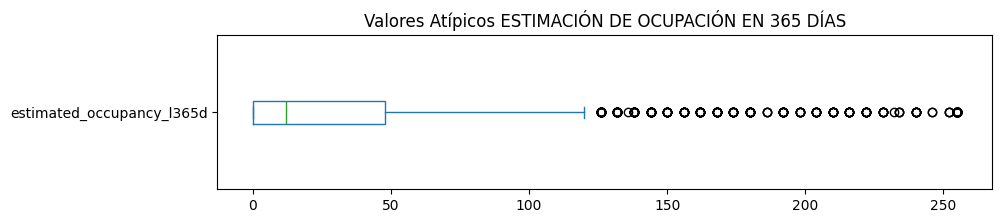

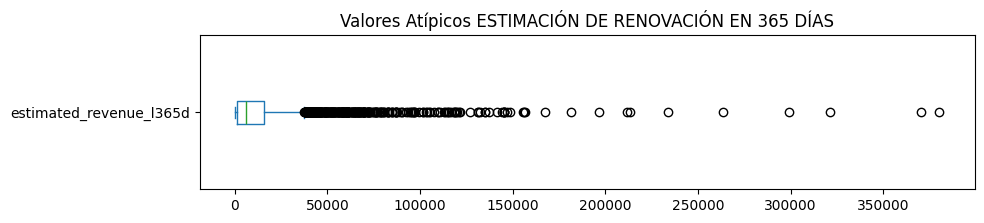

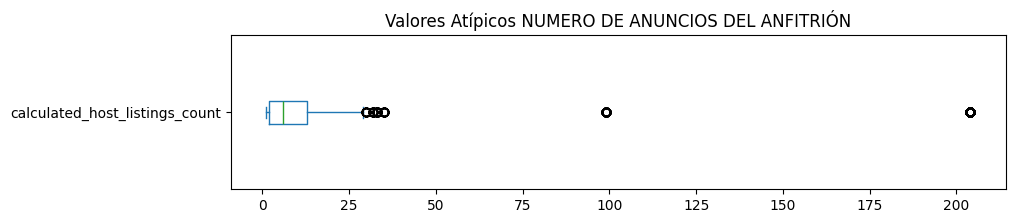

In [213]:
#Evaluación de columnas tipo int para decartar posibles outliers 
fig = plt.figure(figsize =(5, 2))
df['accommodates'].plot(kind='box', vert=False)
plt.title("Valores Atípicos CAPACIDAD MÁXIMA DEL ANUNCIO")
plt.show()

fig = plt.figure(figsize =(5, 2))
df['availability_30'].plot(kind='box', vert=False)
plt.title("Valores Atípicos DISPONIBILIDAD A 30 DÍAS")
plt.show()

fig = plt.figure(figsize =(5, 2))
df['availability_60'].plot(kind='box', vert=False)
plt.title("Valores Atípicos DISPONIBILIDAD A 60 DÍAS")
plt.show()

fig = plt.figure(figsize =(5, 2))
df['availability_90'].plot(kind='box', vert=False)
plt.title("Valores Atípicos DISPONIBILIDAD A 90 DÍAS")
plt.show()

fig = plt.figure(figsize =(5, 2))
df['availability_365'].plot(kind='box', vert=False)
plt.title("Valores Atípicos DISPONIBILIDAD A 365 DÍAS")
plt.show()

fig = plt.figure(figsize =(5, 2))
df['number_of_reviews'].plot(kind='box', vert=False)
plt.title("Valores Atípicos NUMERO DE RESEÑAS")
plt.show()

fig = plt.figure(figsize =(5, 2))
df['number_of_reviews_ltm'].plot(kind='box', vert=False)
plt.title("Valores Atípicos NUMERO DE RESEÑAS ULTIMO 12 MESES")
plt.show()

fig = plt.figure(figsize =(5, 2))
df['number_of_reviews_l30d'].plot(kind='box', vert=False)
plt.title("Valores Atípicos NUMERO DE RESEÑAS ULTIMO 30 DÍAS")
plt.show()

fig = plt.figure(figsize =(5, 2))
df['availability_eoy'].plot(kind='box', vert=False)
plt.title("Valores Atípicos")
plt.show()

fig = plt.figure(figsize =(5, 2))
df['number_of_reviews_ly'].plot(kind='box', vert=False)
plt.title("Valores Atípicos")
plt.show()

fig = plt.figure(figsize =(10, 2))
df['estimated_occupancy_l365d'].plot(kind='box', vert=False)
plt.title("Valores Atípicos ESTIMACIÓN DE OCUPACIÓN EN 365 DÍAS")
plt.show()

fig = plt.figure(figsize =(10, 2))
df['estimated_revenue_l365d'].plot(kind='box', vert=False)
plt.title("Valores Atípicos ESTIMACIÓN DE RENOVACIÓN EN 365 DÍAS")
plt.show()

fig = plt.figure(figsize =(10, 2))
df['calculated_host_listings_count'].plot(kind='box', vert=False)
plt.title("Valores Atípicos NUMERO DE ANUNCIOS DEL ANFITRIÓN")
plt.show()

------Valores a evaluar de int
'calculated_host_listings_count'
'estimated_revenue_l365d' #No dada de alta en la base de datos original ni el diccionario proporcionado por Airbnb
'availability_eoy' #No dada de alta en la base de datos original ni el diccionario proporcionado por Airbnb
'number_of_reviews_ltm'
'number_of_reviews'

------Valores a evalar de float
'price'
'bathrooms'

In [214]:
#Mostrar filas que marquen en la columna 'calculated_host_listings_count' mayor a 75
#Esta columna hace referencia a el número de anuncios que tiene el anfitrión en el rastreo actual, en la ciudad/región geográfica. 
#El total otal de anuncios del anfitrión, permite evaluar su profesionalización.

filtro1 = df[(df['calculated_host_listings_count'] >= 50)]
print(filtro1['calculated_host_listings_count'].min())
print(filtro1['calculated_host_listings_count'].max())

# Número de valores únicos de la columna aplicando el filtro para ver outliers: 
print(filtro1['calculated_host_listings_count'].nunique())
# Lista de valores únicos
print(filtro1['calculated_host_listings_count'].unique())

#Vamos a evalaur si tienen que ver el numero de  anuncios con puntuación general del anuncio con la calificación de super_host (columnas que son compatibles apra corroborar)
filtro2 = df[(df['calculated_host_listings_count'] == 204) & (df['review_scores_rating'] ==5)]
print(filtro2.shape)
filtro6 = df[(df['calculated_host_listings_count'] == 204) & (df['host_is_superhost'] == "t")]
print(filtro6.shape)
filtro3 = df[(df['calculated_host_listings_count'] == 204) & (df['host_is_superhost'] == "t") & (df['review_scores_rating'] ==5)]
print(filtro3.shape)

filtro4 = df[(df['calculated_host_listings_count'] == 99) & (df['review_scores_rating'] ==5)]
print(filtro4.shape)
filtro5 = df[(df['calculated_host_listings_count'] == 99) & (df['host_is_superhost'] == "t") & (df['review_scores_rating'] == 5)]
print(filtro5.shape)


#CONCLUSIÓN: se puede observar que dentro de las variables de corelación con otras columnas que son 'review_scores_rating' (evaluando la puntuación general del huésped de satisfacción) 
#con 'host_is_superhost' (condiereando quees un super anfitrión), podemos darnos cuenta que los valores a 99 si son posibles, pero los valores 204 no son viables, considerandolos como outliers 

99
204
2
[ 99 204]
(14, 50)
(0, 50)
(0, 50)
(45, 50)
(45, 50)


In [215]:
#Mostar filas que muestren en 'number_of_reviews_ltm' 
#Esta columna hace referencia al número de reseñas que tiene el anuncio (en los últimos 12 meses), es util para medir tendencias recentes
filtro7 = df[(df['number_of_reviews_ltm'] >= 67)]
print(filtro7['number_of_reviews_ltm'].min())
print(filtro7['number_of_reviews_ltm'].max())

# Número de valores únicos de la columna aplicando el filtro para ver outliers: 
print(filtro7['number_of_reviews_ltm'].nunique())
# Lista de valores únicos
print(filtro7['number_of_reviews_ltm'].unique())

#Evalaución de outliers con columnas de relación. 
filtro11 = df[(df['number_of_reviews_ltm'] >= 69) & (df['review_scores_rating'] ==5)]
print(filtro11.shape)

filtro12 = df[(df['number_of_reviews_ltm'] >= 69) & (df['host_is_superhost'] == "t") & (df['review_scores_rating'] == 5)]
print(filtro12.shape)

#CONCLUSIÓN: como se puede observar en los filtros de condición no cubren con las columans realcionadas, es decri que si las considaremos como outliers, otras columnas que nos ayudarían a poder evaluar 
# pueden ser columnas con referencias a el número total de húespedes que han reservado, así la evalaución sería más exacto y quitamos los outliers gracias a que cumplia la condicion de que el número de húespedes alojados sería el maximo de reseñas  

69
95
4
[70 69 95 89]
(0, 50)
(0, 50)


In [216]:
#Mostrar filas que muestran en 'number_of_reviews'
#En esta columna contienen el numero de reseñas que tienen el anuncio, es decir, que es un indicador de popularidad y actividad del anuncio.
filtro8 = df[(df['number_of_reviews'] >= 304)]
print(filtro8['number_of_reviews'].min())
print(filtro8['number_of_reviews'].max())

# Número de valores únicos de la columna aplicando el filtro para ver outliers: 
print(filtro8['number_of_reviews'].nunique())
# Lista de valores únicos
print(filtro8['number_of_reviews'].unique())

#Evalaución de outliers con columnas de relación. Esperamos a que el número de filas filtradas sea representantiva para pdoer justificar que si existe relación  
filtro13 = df[(df['number_of_reviews'] >= 317) & (df['review_scores_rating'] == 5)]
print(filtro11.shape)

filtro13 = df[(df['number_of_reviews'] >= 317) & (df['host_is_superhost'] == "t") & (df['review_scores_rating'] == 5)]
print(filtro13.shape)

#CONCLUSIÓN: no exsite un fundamento para considerarlo no outlier

317
471
10
[461 317 409 349 471 418 366 396 320 338]
(0, 50)
(0, 50)


In [217]:
#Mostrar filas que muestran en 'price'
#En esta columna contienen el precio diario, es decir, una variable principal para análisis económico y comparativo
filtro14 = df[(df['price'] >= 1059)]
print(filtro14['price'].min())
print(filtro14['price'].max())

# Número de valores únicos de la columna aplicando el filtro para ver outliers: 
print(filtro14['price'].nunique())
# Lista de valores únicos de menor a mayor
precios_unicos = np.sort(filtro14['price'].unique())
print(precios_unicos)

#Evalaución de outliers con columnas de relación.
filtro15 = df[(df['price'] >= 1059) & (df['room_type'] == 'Entire home/apt') & (df['room_type'] == 'Hotel room' )]
print(filtro15.shape)

filtro16 = df[(df['price'] >= 1059) & (df['bedrooms'] >= 10 )]
print(filtro16.shape)

filtro17 = df[(df['price'] >= 1059) & (df['host_is_superhost'] == "t")]
print(filtro17.shape)

filtro18 = df[(df['price'] >= 1059) & (df['beds'] >= 10 )]
print(filtro18.shape)

#CONCLUSIÓN: no exsite un fundamento para considerarlo no outlier

1059.0
8717.0
217
[1059. 1075. 1081. 1082. 1083. 1084. 1089. 1090. 1092. 1099. 1102. 1104.
 1110. 1111. 1116. 1117. 1118. 1125. 1127. 1128. 1130. 1135. 1136. 1138.
 1148. 1153. 1154. 1157. 1158. 1160. 1170. 1171. 1174. 1177. 1180. 1182.
 1186. 1187. 1188. 1190. 1195. 1198. 1199. 1202. 1204. 1205. 1211. 1213.
 1215. 1217. 1221. 1231. 1239. 1240. 1244. 1246. 1248. 1251. 1255. 1257.
 1259. 1261. 1269. 1271. 1277. 1286. 1289. 1291. 1297. 1298. 1300. 1305.
 1322. 1323. 1324. 1326. 1332. 1338. 1339. 1344. 1345. 1348. 1352. 1355.
 1362. 1368. 1372. 1382. 1390. 1392. 1397. 1400. 1412. 1421. 1427. 1437.
 1440. 1443. 1452. 1456. 1457. 1459. 1462. 1463. 1481. 1500. 1506. 1507.
 1513. 1517. 1523. 1529. 1544. 1545. 1571. 1576. 1598. 1600. 1614. 1620.
 1632. 1635. 1638. 1659. 1687. 1690. 1715. 1728. 1740. 1741. 1749. 1750.
 1753. 1760. 1766. 1777. 1787. 1789. 1816. 1856. 1872. 1873. 1885. 1907.
 1939. 1942. 1945. 1948. 1949. 1952. 1990. 1998. 2016. 2018. 2046. 2084.
 2109. 2117. 2118. 2144. 2147. 21

In [218]:
#Mostrar filas que muestran en 'bathrooms'
#Contienen el número de baños, ayudando a indicar de comodidad y lujo
filtro19 = df[(df['bathrooms'] >= 10)]
print(filtro19['bathrooms'].min())
print(filtro19['bathrooms'].max())

# Número de valores únicos de la columna aplicando el filtro para ver outliers: 
print(filtro19['bathrooms'].nunique())
print(filtro19.shape)

#Evalaución de outliers con columnas de relación.
filtro20 = df[(df['bathrooms'] >= 10) & (df['room_type'] == 'Private room') & (df['room_type'] == 'Shared room' )]
print(filtro20.shape)

filtro21 = df[(df['bathrooms'] >= 10) & (df['room_type'] == 'Entire home/apt') & (df['room_type'] == 'Hotel room' )]
print(filtro21.shape) 

filtro22 = df[(df['price'] >= 1059) & (df['bathrooms'] >= 10 )]
print(filtro22.shape)

#CONCLUSIÓN: se concidera outliers ya que los valores en relación de precio y baños si tienen relación, pero no lo suficiente para no afectar el análisis

10.0
20.0
3
(5, 50)
(0, 50)
(0, 50)
(5, 50)


In [219]:
#Creación de dataframe con columnas que necesitan eliminar outliers

#El uso de este método (cuartiles) es ideal para variables de tipo conteo o monetarias que suelen tener valores muy concentrados y pocos casos extremadamente altos (caso de las siguientes columnas)
cuartiles = df[['calculated_host_listings_count', 'estimated_revenue_l365d', 'number_of_reviews_ltm', 'number_of_reviews', 'price']]


#El uso de este metodo (Desviación estandar) asume que los datos siguen una distribución aproximadamente normal y se considera atípico cualquier valor que se aleje más de 3 desviaciones estándar respecto a la media (caso de las siguienets columnas)
desviacion = df[['bathrooms','availability_eoy']]

In [220]:
#Creación de dataframe con columnas que NO necesitan modificaciones
excluir = ['calculated_host_listings_count', 'estimated_revenue_l365d','number_of_reviews_ltm', 'number_of_reviews', 'price', 'bathrooms', 'availability_eoy']

# Seleccionar todas las columnas que no estan en la lista de exclusión y que son de tipo float e int
restantes = df.select_dtypes(include=['float64', 'int64']).drop(columns=excluir, errors='ignore')

#Corroboración de dataframe
restantes.dtypes

host_id                          int64
host_response_rate               int64
latitude                       float64
longitude                      float64
accommodates                     int64
bedrooms                         int64
beds                             int64
minimum_nights                   int64
maximum_nights                   int64
availability_30                  int64
availability_60                  int64
availability_90                  int64
availability_365                 int64
number_of_reviews_l30d           int64
number_of_reviews_ly             int64
estimated_occupancy_l365d        int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME

In [221]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=desviacion
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido bathrooms             4.802228
availability_eoy    480.230060
dtype: float64
Limite inferior permitido bathrooms           -1.759700
availability_eoy   -64.894784
dtype: float64


In [222]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
df_outilers=desviacion[(y<=Limite_Superior)&(y>=Limite_Inferior)]

#Corroboramos valores nulos del dataframe creado
df_outilers.isnull().sum()

bathrooms           70
availability_eoy     0
dtype: int64

In [223]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_desviacion=df_outilers.copy()
data_desviacion=data_desviacion.fillna(round(df_outilers.mean(),1))

In [224]:
#Corroboramos valores nulos del dataframe LIMPIO
data_desviacion.isnull().sum().sum()

np.int64(0)

PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME

In [225]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuartiles

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido calculated_host_listings_count       29.5
estimated_revenue_l365d           37377.0
number_of_reviews_ltm                20.0
number_of_reviews                    66.0
price                               949.5
dtype: float64
Limite inferior permitido calculated_host_listings_count      -14.5
estimated_revenue_l365d          -20247.0
number_of_reviews_ltm               -12.0
number_of_reviews                   -38.0
price                              -246.5
dtype: float64


In [226]:
#Obtenemos datos limpios del Dataframe
dfOutliers= cuartiles[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

#Corroboramos valores nulos del dataframe creado
dfOutliers.isnull().sum()

calculated_host_listings_count    466
estimated_revenue_l365d           334
number_of_reviews_ltm             282
number_of_reviews                 376
price                             324
dtype: int64

In [227]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_cuartiles = dfOutliers.copy()
data_cuartiles = data_cuartiles.fillna(round(dfOutliers.mean(),1))

In [228]:
#Corroboramos valores nulos del dataframe LIMPIO
data_cuartiles.isnull().sum().sum()

np.int64(0)

UNIMOS EL DATAFRAME

In [229]:
#Concatenamos los diferentes dataframe 
dfLimpio = pd.concat([df_object, restantes, data_desviacion, data_cuartiles], axis=1)

#Corroboramos valores nulos
dfLimpio.isnull().sum().sum()

np.int64(0)

In [230]:
#Exportamos DataFrame
dfLimpio.to_csv("BergamoLimpio.csv")